In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

In [4]:
data_df = pd.read_csv('titanic.csv')

In [5]:
df_select=data_df[['Pclass','Age','Fare']]

In [6]:
def Embarked_(x):
    if x== 'S':
        return 0
    elif x== 'C':
        return 1
    else:
        return 2

age_range=[]
df_select=data_df[['Pclass','Age','Fare','Embarked']]
df_select['Sum_Per']=data_df['SibSp']+data_df['Parch']
df_select['Sex_01']=data_df['Sex'].apply(lambda x: 1 if x=='male' else 0)
df_select['Embarked_012']=data_df['Embarked'].apply(lambda x: Embarked_(x))
age_range=(df_select['Age']//10)
Fare_range=((df_select['Fare']//10)*10).astype(int)

df_select['Fare_range']=Fare_range
df_select['age_range']=age_range

df_select_data=df_select[['Pclass','Fare_range','Sum_Per','Sex_01','age_range','Embarked_012']]
df_select_target=df_select[['age_range']]

XG_test=df_select_data
XG_test['Survived']=data_df['Survived']
XG_test

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
0,3,0,1,1,2.0,0,0
1,1,70,1,0,3.0,1,1
2,3,0,0,0,2.0,0,1
3,1,50,1,0,3.0,0,1
4,3,0,0,1,3.0,0,0
5,3,0,0,1,NaN,2,0
6,1,50,0,1,5.0,0,0
7,3,20,4,1,0.0,0,0
8,3,10,2,0,2.0,0,1
9,2,30,1,0,1.0,1,1


In [23]:
df_select_data_1=df_select_data.dropna(axis=0)

In [24]:
df_select_target_1=df_select_target.dropna(axis=0)

# Random Forest

In [25]:
Data_Merge=df_select_data['age_range'].isnull()==False
Data_Merging=df_select_data[Data_Merge]
Data_Merging

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
0,3,0,1,1,2.0,0,0
1,1,70,1,0,3.0,1,1
2,3,0,0,0,2.0,0,1
3,1,50,1,0,3.0,0,1
4,3,0,0,1,3.0,0,0
6,1,50,0,1,5.0,0,0
7,3,20,4,1,0.0,0,0
8,3,10,2,0,2.0,0,1
9,2,30,1,0,1.0,1,1
10,3,10,2,0,0.0,0,1


In [26]:
Testing_data=df_select_data['age_range'].isnull()==True
Testing=df_select_data[Testing_data]

Testing

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
5,3,0,0,1,NaN,2,0
17,2,10,0,1,NaN,0,1
19,3,0,0,0,NaN,1,1
26,3,0,0,1,NaN,1,0
28,3,0,0,0,NaN,2,1
29,3,0,0,1,NaN,0,0
31,1,140,1,0,NaN,1,1
32,3,0,0,0,NaN,2,1
36,3,0,0,1,NaN,1,1
42,3,0,0,1,NaN,1,0


In [27]:
df_select_data_2=df_select_data.dropna(axis=0)
df_select_data_2=df_select_data_2.apply(pd.to_numeric)
df_select_data_2=df_select_data_2.astype(int)
y1=np.ravel(df_select_data_2[['age_range']],order='C')


In [28]:
x2=df_select_data_2.as_matrix()
x2


array([[ 3,  0,  1, ...,  2,  0,  0],
       [ 1, 70,  1, ...,  3,  1,  1],
       [ 3,  0,  0, ...,  2,  0,  1],
       ...,
       [ 1, 30,  0, ...,  1,  0,  1],
       [ 1, 30,  0, ...,  2,  1,  1],
       [ 3,  0,  0, ...,  3,  2,  0]])

In [29]:
from sklearn.model_selection import train_test_split
x=df_select_data_2[['Pclass','Fare_range','Sum_Per','Sex_01','Embarked_012']]
y=df_select_data_2['age_range']
x_XG=df_select_data_2[['Fare_range','Sum_Per']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

499
215
499
215


# xgboost

In [31]:
x_XG=df_select_data_2[['Pclass','Fare_range','Sex_01','Sum_Per','Embarked_012']]
y=df_select_data_2['age_range']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_XG, y, test_size=0.3, random_state=0)

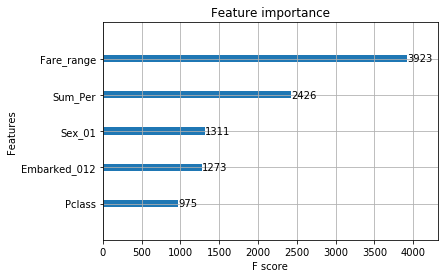

In [33]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb

# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)
plot_importance(model_XG)
pyplot.show()

In [34]:
model_XG.score(X_test,y_test)

0.31627906976744186

In [44]:
X_test

,Pclass,Fare_range,Sex_01,Sum_Per,Embarked_012
423,3,10,0,2,0
177,1,20,0,0,1
305,1,150,1,3,0
292,2,10,1,0,1
889,1,30,1,0,1
595,3,20,1,2,0
637,2,20,1,2,0
54,1,60,1,1,1
456,1,20,1,0,0
110,1,50,1,0,0


In [45]:
xTesting=Testing[['Pclass','Fare_range','Sex_01','Sum_Per','Embarked_012']]
model_XG.predict(xTesting)

array([3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 4, 1, 0, 4, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 4, 2, 3, 0, 0, 2, 2, 1, 3, 4, 0, 4, 2, 3, 4, 3, 1, 1, 1, 2,
       0, 2, 1, 4, 2, 2, 3, 1, 4, 1, 2, 4, 3, 4, 1, 4, 3, 2, 2, 1, 0, 5,
       2, 0, 4, 2, 1, 1, 4, 1, 1, 4, 2, 3, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 0, 3, 2, 1, 1, 4, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 3, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3,
       3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 4, 1, 1, 2, 2, 2, 4, 1,
       3, 4, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 3, 2, 2, 3, 1, 4, 2, 4, 2, 2,
       3])

In [38]:
Testing

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
5,3,0,0,1,NaN,2,0
17,2,10,0,1,NaN,0,1
19,3,0,0,0,NaN,1,1
26,3,0,0,1,NaN,1,0
28,3,0,0,0,NaN,2,1
29,3,0,0,1,NaN,0,0
31,1,140,1,0,NaN,1,1
32,3,0,0,0,NaN,2,1
36,3,0,0,1,NaN,1,1
42,3,0,0,1,NaN,1,0


In [46]:
Testing['age_range']=model_XG.predict(xTesting)
Testing

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
5,3,0,0,1,3,2,0
17,2,10,0,1,2,0,1
19,3,0,0,0,1,1,1
26,3,0,0,1,2,1,0
28,3,0,0,0,1,2,1
29,3,0,0,1,2,0,0
31,1,140,1,0,2,1,1
32,3,0,0,0,1,2,1
36,3,0,0,1,2,1,1
42,3,0,0,1,2,1,0


In [515]:
Data_Merging

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
0,3,0,1,1,2.0,0,0
1,1,70,1,0,3.0,1,1
2,3,0,0,0,2.0,0,1
3,1,50,1,0,3.0,0,1
4,3,0,0,1,3.0,0,0
6,1,50,0,1,5.0,0,0
7,3,20,4,1,0.0,0,0
8,3,10,2,0,2.0,0,1
9,2,30,1,0,1.0,1,1
10,3,10,2,0,0.0,0,1


In [519]:
fin=pd.concat([Testing,Data_Merging], axis=0)
fin_sort=fin.sort_index()
fin_sort

,Pclass,Fare_range,Sum_Per,Sex_01,age_range,Embarked_012,Survived
0,3,0,1,1,2.0,0,0
1,1,70,1,0,3.0,1,1
2,3,0,0,0,2.0,0,1
3,1,50,1,0,3.0,0,1
4,3,0,0,1,3.0,0,0
5,3,0,0,1,3.0,2,0
6,1,50,0,1,5.0,0,0
7,3,20,4,1,0.0,0,0
8,3,10,2,0,2.0,0,1
9,2,30,1,0,1.0,1,1


In [520]:
fin_sort.to_csv("test.csv")